In [39]:
# Install otter-grader package
%pip install otter-grader

# Initialize Otter
import otter
grader = otter.Notebook("hw1_background_mathematics.ipynb")

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


# Homework 1 -- Background Mathematics

## Introduction

The purpose of this Python notebook is multifold:
* to familiarize yourself with the process of completing Jupyter notebook assignments and
* refresher on some of the background mathematical concepts that you are going to need to understand deep learning.
 
It's not meant to be difficult and it may be that you know some or all of this information already.

Math is *NOT* a spectator sport.  You won't learn it by just listening to lectures or reading books.  It really helps to interact with it and explore yourself.

Work through the cells below, running each cell in turn.  

In various places you will see prompts and incomplete cells. Follow the instructions at these places and write code to complete the functions.  

There are also questions interspersed in the text.

(Based on [Notebook 1.1](https://github.com/udlbook/udlbook/blob/main/Notebooks/Chap01/1_1_BackgroundMathematics.ipynb) of
_Understanding Deep Learning_)

## Working with Jupyter Notebook Assignments

You can either complete the notebook on Colab or in your local environment.

### Completing the notebook on Colab

To complete the notebook on Colab, you can click on the "Open in Colab" button
below and it will open the notebook from our public class notebook repository
on GitHub.

> Note that you will have save the notebook to your own Google Drive by clicking
on File -> Save a Copy in Drive.

> Also note that the Otter Grader cells will not run in Colab, but you can just
> avoid executing those cells. For any public tests, you can submit to Gradescope
> and inspect your results there.

<a href="https://colab.research.google.com/github/DL4DS/sp2025_homeworks/blob/main/hw1/hw1_background_mathematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [2]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

### Completing the notebook in a local environment

For local environments, after setting up your Python and Jupyter environments,
you have the option of using either
* Jupyter Lab or Notebook interface, or with
* VSCode and the Jupyter extension pack

In both cases we strongly encourage you to make sure you have a recent version
of Python (>=3.10) and use a virtual environment such as `venv` or miniconda
environment.

## Part 1 -- Linear Functions in 1D, 2D and 3D

### Linear functions

We will be using the term *linear equation* to mean a weighted sum of inputs plus an offset.

> Strictly speaking mathematically that is actually _affine_, but we'll adhere to the 
> more relaxed terminology used in the deep learning literature.

If there is just one input $x$, then this is a straight line:

\begin{equation}y=\beta+\omega x,\end{equation}

where $\beta$ is the y-intercept of the linear and $\omega$ is the slope of the line. 

When there are two inputs $x_{1}$ and $x_{2}$, then this becomes a plane:

\begin{equation}y=\beta+\omega_1 x_1 + \omega_2 x_2.\end{equation}

You can extend this to an arbitrary number of inputs. Any other form of functions
are by definition **non-linear**.

**Question 1.** Define a linear function with just one input, $x$.

In [30]:
def linear_function_1D(x,beta,omega):
  """Linear function with one input, x"""
  # complete the code line below with the formula for the 1D linear equation
  y = beta+omega*x

  return y

In [31]:
grader.check("q1")

q1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.** Change the values of beta and omega to make a line
that crosses the y-axis at y=10 and the x-axis at x=5

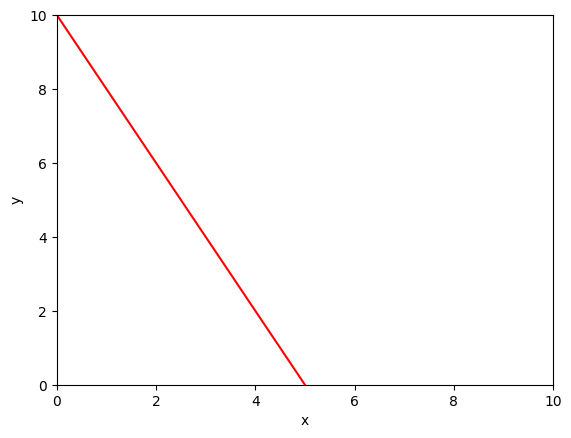

In [32]:
# Plot the 1D linear function

# Define an array of x values from 0 to 10 with increments of 0.01
x = np.arange(0.0,10.0, 0.01)

beta = 10
omega = -2

# Compute y using the function you filled in above
y = linear_function_1D(x,beta,omega)

# Plot this function
fig, ax = plt.subplots()
ax.plot(x,y,'r-')
ax.set_ylim([0,10]);ax.set_xlim([0,10])
ax.set_xlabel('x'); ax.set_ylabel('y')
plt.show()

<!-- END QUESTION -->

For convenience, we define `draw_2D_function()` to draw a contour plot of 2D
functions.  This is like a 2D topographic map with contour lines tracing paths
of equal value. Here, the brighter and whiter the color, the higher the value.

In [33]:
# Code to draw 2D function -- read it so you know what is going on, but you don't have to change it
def draw_2D_function(x1_mesh, x2_mesh, y):
    fig, ax = plt.subplots()
    fig.set_size_inches(7,7)
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    fig.colorbar(pos, ax=ax)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')
    plt.show()

Now let's investigate a 2D linear function

**Question 3.** Define a linear function with two inputs, $x_1$ and $x_2$.

In [34]:
# Define a linear function with two inputs, x1 and x2
def linear_function_2D(x1,x2,beta,omega1,omega2):
  # complete the code line below with formula for 2D linear equation
  y = beta+omega1*x1+omega2*x2

  return y

In [35]:
grader.check("q3")

q3 results: All test cases passed!

We'll plot the 2D function with the following code.  You don't need to change it.

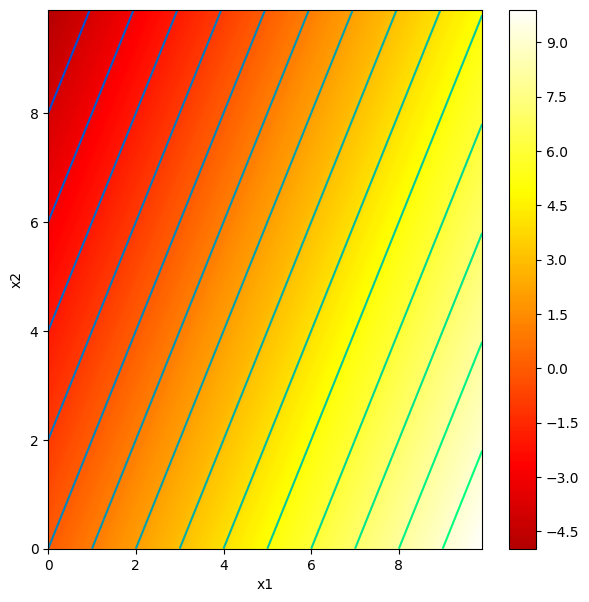

In [ ]:
# Plot the 2D function

# Make 2D array of x and y points
x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# Compute the 2D function for given values of omega1, omega2
beta = 0.0; omega1 = 1.0; omega2 = -0.5
y  = linear_function_2D(x1,x2,beta, omega1, omega2)

# Draw the function.
# Color represents y value (brighter = higher value)
# Black = -10 or less, White = +10 or more
# 0 = mid orange
# Lines are contours where value is equal
draw_2D_function(x1,x2,y)


This is a contour plot of a plane (because all the contours are straight lines)
that is sloping up from the top left to the bottom right (because the colors are
getting brighter).

<!-- BEGIN QUESTION -->

**Question 4.** Describe (in words like we did for the previous plot) what this
plot looks like when you set omega_1 to zero.

If we change omega_1 to 0, we essentially remove effect of x1, therefore y is no longer dependent on it and is only dependent on x2. therefore the plot changes to 1d representation, and there will be only linear horizontal lines.

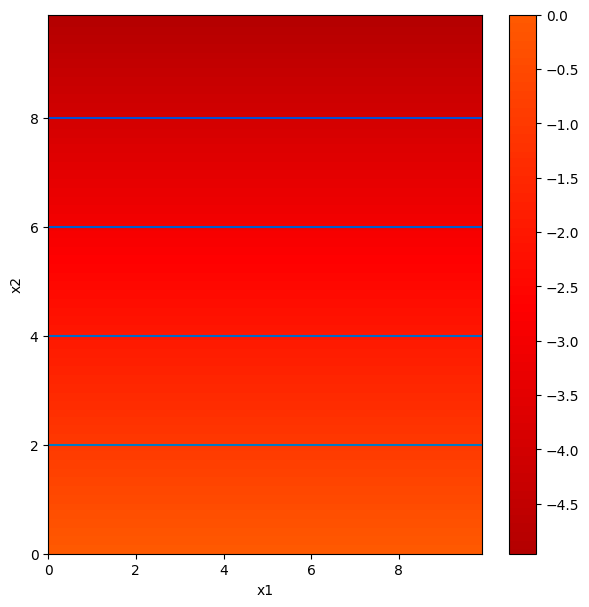

In [ ]:
beta = 0.0
omega1 = 0
omega2 = -0.5
y  = linear_function_2D(x1,x2,beta, omega1, omega2)

draw_2D_function(x1,x2,y)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5.** Describe what this plot looks like when you set omega_2 to zero.

Similar to prevoius, the y is only dependent on x1, therefore the lines will be linear vertical as the effect of x2 is removed. 

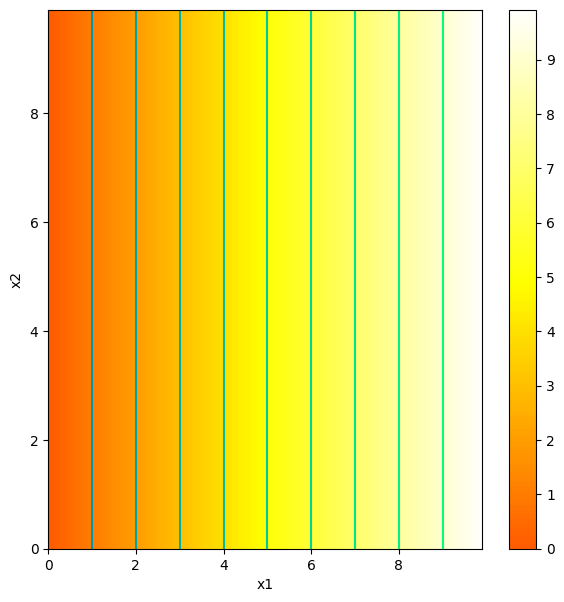

In [40]:
beta = 0.0
omega1 = 1.0
omega2 = 0

y  = linear_function_2D(x1,x2,beta, omega1, omega2)

draw_2D_function(x1,x2,y)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 6.** Describe what this plot looks like when you set beta to -5.

The contour lines shifts downwoards, making it more deep than it was before. It is darker.

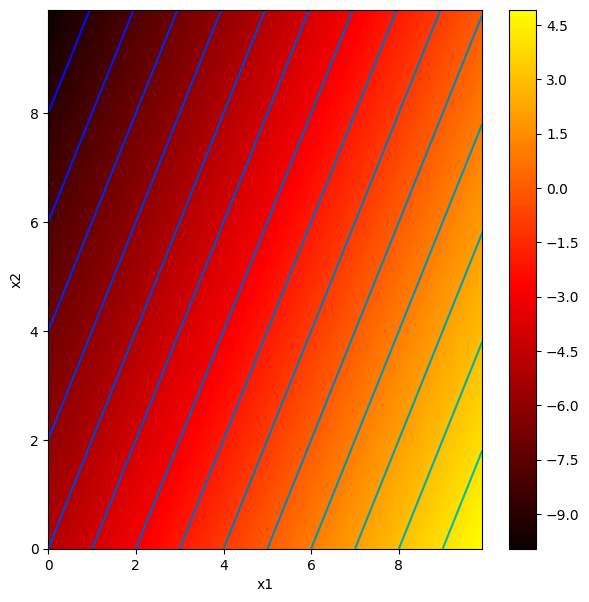

In [41]:

beta = -5
omega1 = 1.0
omega2 = -0.5
y  = linear_function_2D(x1,x2,beta, omega1, omega2)

draw_2D_function(x1,x2,y)

<!-- END QUESTION -->

## Matrix Linear Equations

Often we will want to compute many linear functions at the same time.  For example, we might have three inputs, $x_1$, $x_2$, and $x_3$ and want to compute two linear functions giving $y_1$ and $y_2$. Of course, we could do this by just running each equation separately,<br><br>

\begin{align}y_1 &=& \beta_1 + \omega_{11} x_1 + \omega_{12} x_2 + \omega_{13} x_3\\
y_2 &=& \beta_2 + \omega_{21} x_1 + \omega_{22} x_2 + \omega_{23} x_3.
\end{align}

However, we can write it more compactly with vectors and matrices:

\begin{equation}
\begin{bmatrix} y_1\\ y_2 \end{bmatrix} = \begin{bmatrix}\beta_{1}\\\beta_{2}\end{bmatrix}+ \begin{bmatrix}\omega_{11}&\omega_{12}&\omega_{13}\\\omega_{21}&\omega_{22}&\omega_{23}\end{bmatrix}\begin{bmatrix}x_{1}\\x_{2}\\x_{3}\end{bmatrix},
\end{equation}
or

\begin{equation}
\mathbf{y} = \boldsymbol\beta +\boldsymbol\Omega\mathbf{x}.
\end{equation}

for short.  Here, lowercase bold symbols are used for vectors.  Upper case bold symbols are used for matrices.



**Question 7.** Define a linear function with three inputs, x1, x2, and x_3.

In [42]:
# Define a linear function with three inputs, x1, x2, and x_3
def linear_function_3D(x1,x2,x3,beta,omega1,omega2,omega3):
  # replace the code below with formula for a single 3D linear equation
  y = beta+omega1*x1+omega2*x2+omega3*x3

  return y

In [43]:
grader.check("q7")

q7 results: All test cases passed!

Let's compute two linear equations, using both the individual equations and the vector / matrix form and check they give the same result

In [44]:
# Define the parameters
beta1 = 0.5; beta2 = 0.2
omega11 =  -1.0 ; omega12 = 0.4; omega13 = -0.3
omega21 =  0.1  ; omega22 = 0.1; omega23 = 1.2

# Define the inputs
x1 = 4 ; x2 =-1; x3 = 2

# Compute using the individual equations
y1 = linear_function_3D(x1,x2,x3,beta1,omega11,omega12,omega13)
y2 = linear_function_3D(x1,x2,x3,beta2,omega21,omega22,omega23)
print("Individual equations")
print('y1 = %3.3f\ny2 = %3.3f'%((y1,y2)))

# Define vectors and matrices
beta_vec = np.array([[beta1],[beta2]])
omega_mat = np.array([[omega11,omega12,omega13],[omega21,omega22,omega23]])
x_vec = np.array([[x1], [x2], [x3]])

# Compute with vector/matrix form
y_vec = beta_vec+np.matmul(omega_mat, x_vec)
print("Matrix/vector form")
print('y1= %3.3f\ny2 = %3.3f'%((y_vec[0][0],y_vec[1][0])))


Individual equations
y1 = -4.500
y2 = 2.900
Matrix/vector form
y1= -4.500
y2 = 2.900


<!-- BEGIN QUESTION -->


**Question 8.**  A single linear equation with three inputs (i.e. **linear_function_3D()**) associates a value y with each point in a 3D space ($x_1$,$x_2$,$x_3$).  What value is at position (0,0,0)?


It is the value of the intercept- Beta matrix.

In [46]:
# Define the parameters
beta1 = 0.5; beta2 = 0.2
omega11 =  -1.0 ; omega12 = 0.4; omega13 = -0.3
omega21 =  0.1  ; omega22 = 0.1; omega23 = 1.2

# Define the inputs
x1 = 0 ; x2 =0; x3 = 0
# Define vectors and matrices
beta_vec = np.array([[beta1],[beta2]])
omega_mat = np.array([[omega11,omega12,omega13],[omega21,omega22,omega23]])
x_vec = np.array([[x1], [x2], [x3]])

# Compute with vector/matrix form
y_vec = beta_vec+np.matmul(omega_mat, x_vec)
print("Matrix/vector form")
print('y1= %3.3f\ny2 = %3.3f'%((y_vec[0][0],y_vec[1][0])))

Matrix/vector form
y1= 0.500
y2 = 0.200


<!-- END QUESTION -->

**Question 9.** Write code to compute three linear equations with two inputs ($x_1$, $x_2$) using both the individual equations and the matrix form (you can make up any values for the inputs $\beta_{i}$ and the slopes $\omega_{ij}$.

In [49]:
def equations_2D(x1,x2,beta1,beta2,beta3,omega11,omega12,omega21,omega22,omega31,omega32):
  # replace the code below with formulas for the 3 equations
  y1 = beta1+omega11*x1+omega12*x2
  y2 = beta2+omega21*x1+omega22*x2
  y3 = beta3+omega31*x1+omega32*x2

  return np.array([[y1], [y2], [y3]])

def matrix_2D(x1,x2,beta1,beta2,beta3,omega11,omega12,omega21,omega22,omega31,omega32):
  # replace the code below with formula for a single 3D linear equation

  beta_vec = np.array([[beta1],[beta2], [beta3]])
  omega_mat = np.array([[omega11,omega12],[omega21,omega22], [omega31, omega32]])
  x_vec = np.array([[x1], [x2]])


  y_vec = beta_vec+np.matmul(omega_mat, x_vec)
  return y_vec

In [50]:
grader.check("q9")

q9 results: All test cases passed!

## Special functions

Throughout the book, we'll be using some special functions (see Appendix B.1.3).  The most important of these are the logarithm and exponential functions.  Let's investigate their properties.

### Exponential function

We'll start with the exponential function $y=\exp[x]=e^x$ which maps the real line $[-\infty,+\infty]$ to non-negative numbers $[0,+\infty]$.

Let's draw the exponential function.

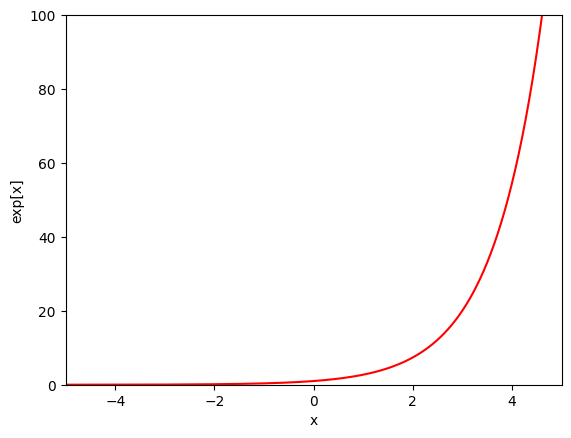

In [51]:
# Define an array of x values from -5 to 5 with increments of 0.01
x = np.arange(-5.0,5.0, 0.01)
y = np.exp(x)

# Plot this function
fig, ax = plt.subplots()
ax.plot(x,y,'r-')
ax.set_ylim([0,100]);ax.set_xlim([-5,5])
ax.set_xlabel('x'); ax.set_ylabel('exp[x]')
plt.show()

**Question 10.** A function is convex if we can draw a straight line between any two points on the function, and the line lies above the function everywhere between these two points. Similarly, a function is concave if a straight line between any two points lies below the function everywhere between these two points.  

Is the exponential function convex or concave or neither? Answer `True`, `False` or `None`.

The exponential function is always convex. First, we can see that when we draw the line, it is above the function. Next we can take a second derivative, and see it is positive, therefore it is convex.


In [53]:
# Complete line with 'convex' or 'concave' or 'neither'
exponential_is = 'convex'

In [54]:
grader.check("q10")

q10 results: All test cases passed!

Evaluate the following expressions using numpy. The numpy functions `np.exp()` and `np.log()` are the exponential and logarithm functions.

Numpy can represent undefined values by using `np.nan`, which is short for "not a number",
positive infinity by using `np.inf`, and negative infinity by using `-np.inf`.

**Question 11.** Compute the following values and observe the result.

1. What is $\exp[0]$?
2. What is $\exp[1]$? 
3. What is $\exp[-\infty]$?
4. What is $\exp[+\infty]$?

In [55]:
exp_0 = np.exp(0)
print(exp_0)

exp_1 = np.exp(1)
print(exp_1)

exp_neg_inf = np.exp(-np.inf)
print(exp_neg_inf)

exp_pos_inf = np.exp(np.inf)
print(exp_pos_inf)


1.0
2.718281828459045
0.0
inf


In [56]:
grader.check("q11")

q11 results: All test cases passed!

### Logarithm function

Now let's consider the logarithm function $y=\log[x]$. Throughout the class we always use natural (base $e$) logarithms. The log function maps non-negative numbers $[0,\infty]$ to real numbers $[-\infty,\infty]$.  It is the inverse of the exponential function.  So when we compute $\log[x]$ we are really asking "What is the number $y$ so that $e^y=x$?"

Let's draw the logarithm function.

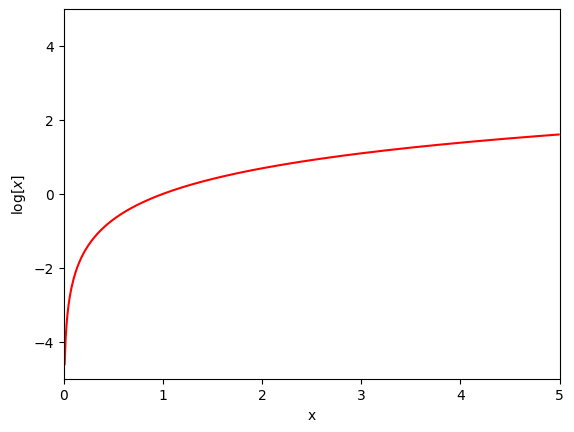

In [57]:
# Define an array of x values from -5 to 5 with increments of 0.01
x = np.arange(0.01,5.0, 0.01)
y = np.log(x)

# Plot this function
fig, ax = plt.subplots()
ax.plot(x,y,'r-')
ax.set_ylim([-5,5]);ax.set_xlim([0,5])
ax.set_xlabel('x'); ax.set_ylabel('$\\log[x]$')
plt.show()

**Question 12.** Is the logarithm function concave, convex or neither?

In [58]:
# Complete line with 'convex' or 'concave' or 'neither'
logarithm_is = 'concave'

In [59]:
grader.check("q12")

q12 results: All test cases passed!

**Question 13.** Compute the following values and observe the result.

1. What is $\log[0]$?  
2. What is $\log[1]$?
3. What is $\log[e]$?
4. What is $\log[\exp[3]]$?
5. What is $\exp[\log[4]]$?

In [61]:
log_0 = np.log(0)
print(log_0)

log_1 = np.log(1)
print(log_1)

log_e = np.log(np.exp(1))
print(log_e)

log_exp_3 = np.log(np.exp(3))
print(log_exp_3)

exp_log_4 = np.exp(np.log(4))
print(exp_log_4)

-inf
0.0
1.0
3.0
4.0


/var/folders/44/36wxfd3s6kl5t4k26k5pyhk80000gn/T/ipykernel_73453/643916891.py:1: RuntimeWarning: divide by zero encountered in log
  log_0 = np.log(0)


In [62]:
grader.check("q13")

q13 results: All test cases passed!

## Homework Time Survey

This is an optional question with no score so that we can better gauge homework load. 
About long did it take you to do this homework?

around 70min

## Submission Instructions

For a clean submission you should:
1. Clear all outputs
2. Restart the kernel
3. Run all cells in order

> If you are running on Colab, you will get errors on the Otter Grader related
> cells, so you will likely have to manually execute the cells in order, 
> avoiding the Otter Grader cells.